# Multivariate Analysis & Dimensionality Reduction: PCA, MCA, FAMD & Clustering
This notebook explores and applies dimensionality reduction techniques on the UCI Bank Marketing dataset.
The goal is to:
- Understand and implement **PCA** (Principal Component Analysis)
- Later, extend to **MCA** (Multiple Correspondence Analysis) for categorical data
- And **FAMD** (Factor Analysis of Mixed Data) for mixed types

**Dataset**: UCI Bank Marketing Dataset  
**Techniques**: PCA, MCA, FAMD, Correspondence Analysis, Clustering  
**Tools**: Python (prince, scikit-learn, plotly)

## 1. Import Libraries & Configuration
*Essential packages for multivariate analysis and visualization*

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import prince  
from sklearn.preprocessing import StandardScaler


## 2. Load and Explore Dataset  
*Import banking data and verify structure*

In [12]:
df = pd.read_csv(r"C:\Users\yasmi\projects\uci_bank_marketing_multivariate_analysis\bank+marketing\bank-additional-full.csv", sep=';')
print(df.shape)
df.head()


(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3. Selecting Numerical Variables
PCA only works with numerical variables.
We'll extract the numerical columns and standardize them.

In [13]:
num_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

df_num = df[num_cols]

# Standardize
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=num_cols
)

df_num_scaled.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


## 4. Applying PCA 

We'll perform PCA on standardized numerical features using the `prince` library.
This helps us identify the main axes of variance in the dataset.


In [14]:
pca = prince.PCA(n_components=5,n_iter=10,rescale_with_mean=True,rescale_with_std=True,random_state=42)
pca = pca.fit(df_num_scaled)
df_pca = pca.transform(df_num_scaled)
df_pca.head()


component,0,1,2,3,4
0,-1.267980,0.890315,-1.488015,0.005825,0.103034
1,-1.278872,0.879321,-1.531299,-0.350193,-0.109513
2,-1.274307,0.420055,-0.324230,0.364118,-0.788097
3,-1.281248,0.469023,-0.495276,0.069054,-0.830913
4,-1.263445,0.904758,-1.495275,0.142061,0.207868


PC1: 38.95%
PC2: 13.59%
PC3: 10.78%
PC4: 10.50%
PC5: 9.29%


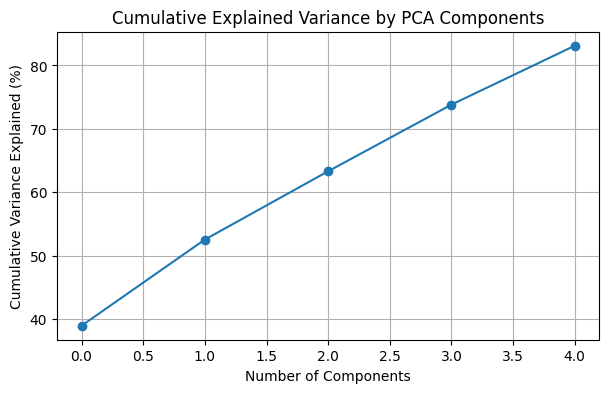

In [15]:
explained_variance = pca.percentage_of_variance_

for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2f}%")

# Scree plot
plt.figure(figsize=(7,4))
plt.plot(pca.cumulative_percentage_of_variance_, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid()
plt.show()


In [16]:

df_vis = df_pca.copy()
df_vis['y'] = df['y']
fig = px.scatter(df_vis, x=0, y=1, color='y',title="PCA Projection (PC1 vs PC2)",labels={'0': 'PC1', '1': 'PC2'})
fig.show()
